# Conway's Reverse Game of Life 2020

![Game of Life](https://i.ytimg.com/vi/4nCTgnbz2fM/maxresdefault.jpg)

The Game of Life is, briefly, a two-dimensional cellular automata universe governed by a simple set of birth, death and survival rules. It was invented in 1970 by the Cambridge mathematician John Conway and popularized by a series of articles in "Scientific American" by Martin Gardner. Each of the cells in the 2d universe can be in one of two states: alive or dead. Beginning with any given initial pattern of live cells, one can employ Conway's rules in order to determine the behavior of the universe over any number of generations or time steps. Whether a cell survives, dies or comes into being is determined by the number of live neighbors the cell has. Each cell has eight possible neighbors (four on its sides, four on its corners).

![life](https://www.researchgate.net/profile/Yan_Liu40/publication/274743186/figure/fig3/AS:667642776006657@1536189850143/Element-of-cellular-automata-CA-top-with-Conways-game-of-life-as-illustration.png)

# Rules of the game

1. Survival: if a live cell has two or three live neighbors, it survives.
2. Death: if a live cell has less than two or more than three live neighbors, it dies.
3. birth: if a dead cell has exactly three live neighbors, it is born.

> When one employs these rules to any given initial pattern of live cells, the results can be startling. Complex behavior consisting of various Life forms, composed of several or more living cells, often occurs.

> This is my first competition. If you find this notebook helpful, please upvote. Thank You.

# Importing necessary Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from functions import *
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Conv2DTranspose, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
%load_ext Cython
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
sample = pd.read_csv(f'{PATH_DF}/conways-reverse-game-of-life-2020/sample_submission.csv')
test = pd.read_csv(f'{PATH_DF}/conways-reverse-game-of-life-2020/test.csv')
train = pd.read_csv(f'{PATH_DF}/conways-reverse-game-of-life-2020/train.csv')


# Exploring Data

In [3]:
train.shape

(50000, 1252)

In [4]:
train.head()

,id,delta,start_0,start_1,start_2,start_3,start_4,start_5,start_6,start_7,...,stop_615,stop_616,stop_617,stop_618,stop_619,stop_620,stop_621,stop_622,stop_623,stop_624
0,0,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,3,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,3,5,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
train.id.nunique()

50000

In [6]:
train.delta.value_counts()

delta
1    10113
2    10015
4     9968
3     9954
5     9950
Name: count, dtype: int64

In [7]:
train.start_0.value_counts()

start_0
0    42081
1     7919
Name: count, dtype: int64

In [8]:
train.stop_0.value_counts()

stop_0
0    42542
1     7458
Name: count, dtype: int64

In [9]:
sample.head()

,id,start_0,start_1,start_2,start_3,start_4,start_5,start_6,start_7,start_8,...,start_615,start_616,start_617,start_618,start_619,start_620,start_621,start_622,start_623,start_624
0,50000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,50002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
sample.describe()

,id,start_0,start_1,start_2,start_3,start_4,start_5,start_6,start_7,start_8,...,start_615,start_616,start_617,start_618,start_619,start_620,start_621,start_622,start_623,start_624
count,50000.000000,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0
mean,74999.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,14433.901067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,50000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,62499.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,74999.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,87499.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,99999.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train.describe()

,id,delta,start_0,start_1,start_2,start_3,start_4,start_5,start_6,start_7,...,stop_615,stop_616,stop_617,stop_618,stop_619,stop_620,stop_621,stop_622,stop_623,stop_624
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.00000,50000.00000,50000.00000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,24999.500000,2.992540,0.158380,0.157860,0.157680,0.157760,0.157820,0.157940,0.160320,0.159320,...,0.147180,0.14598,0.14624,0.14668,0.14838,0.148860,0.145860,0.14620,0.149340,0.148040
std,14433.901067,1.415869,0.365101,0.364613,0.364444,0.364519,0.364576,0.364688,0.366906,0.365978,...,0.354289,0.35309,0.35335,0.35379,0.35548,0.355954,0.352969,0.35331,0.356427,0.355143
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,12499.750000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,24999.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,37499.250000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
max,49999.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.00000,1.00000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
sample_start_1 = train.loc[1, train.columns.str.startswith('start')]
sample_stop_1 = train.loc[1, train.columns.str.startswith('stop')]

In [13]:
sample_start_1 = np.asarray(sample_start_1).reshape(25, 25)
sample_stop_1 = np.asarray(sample_stop_1).reshape(25, 25)

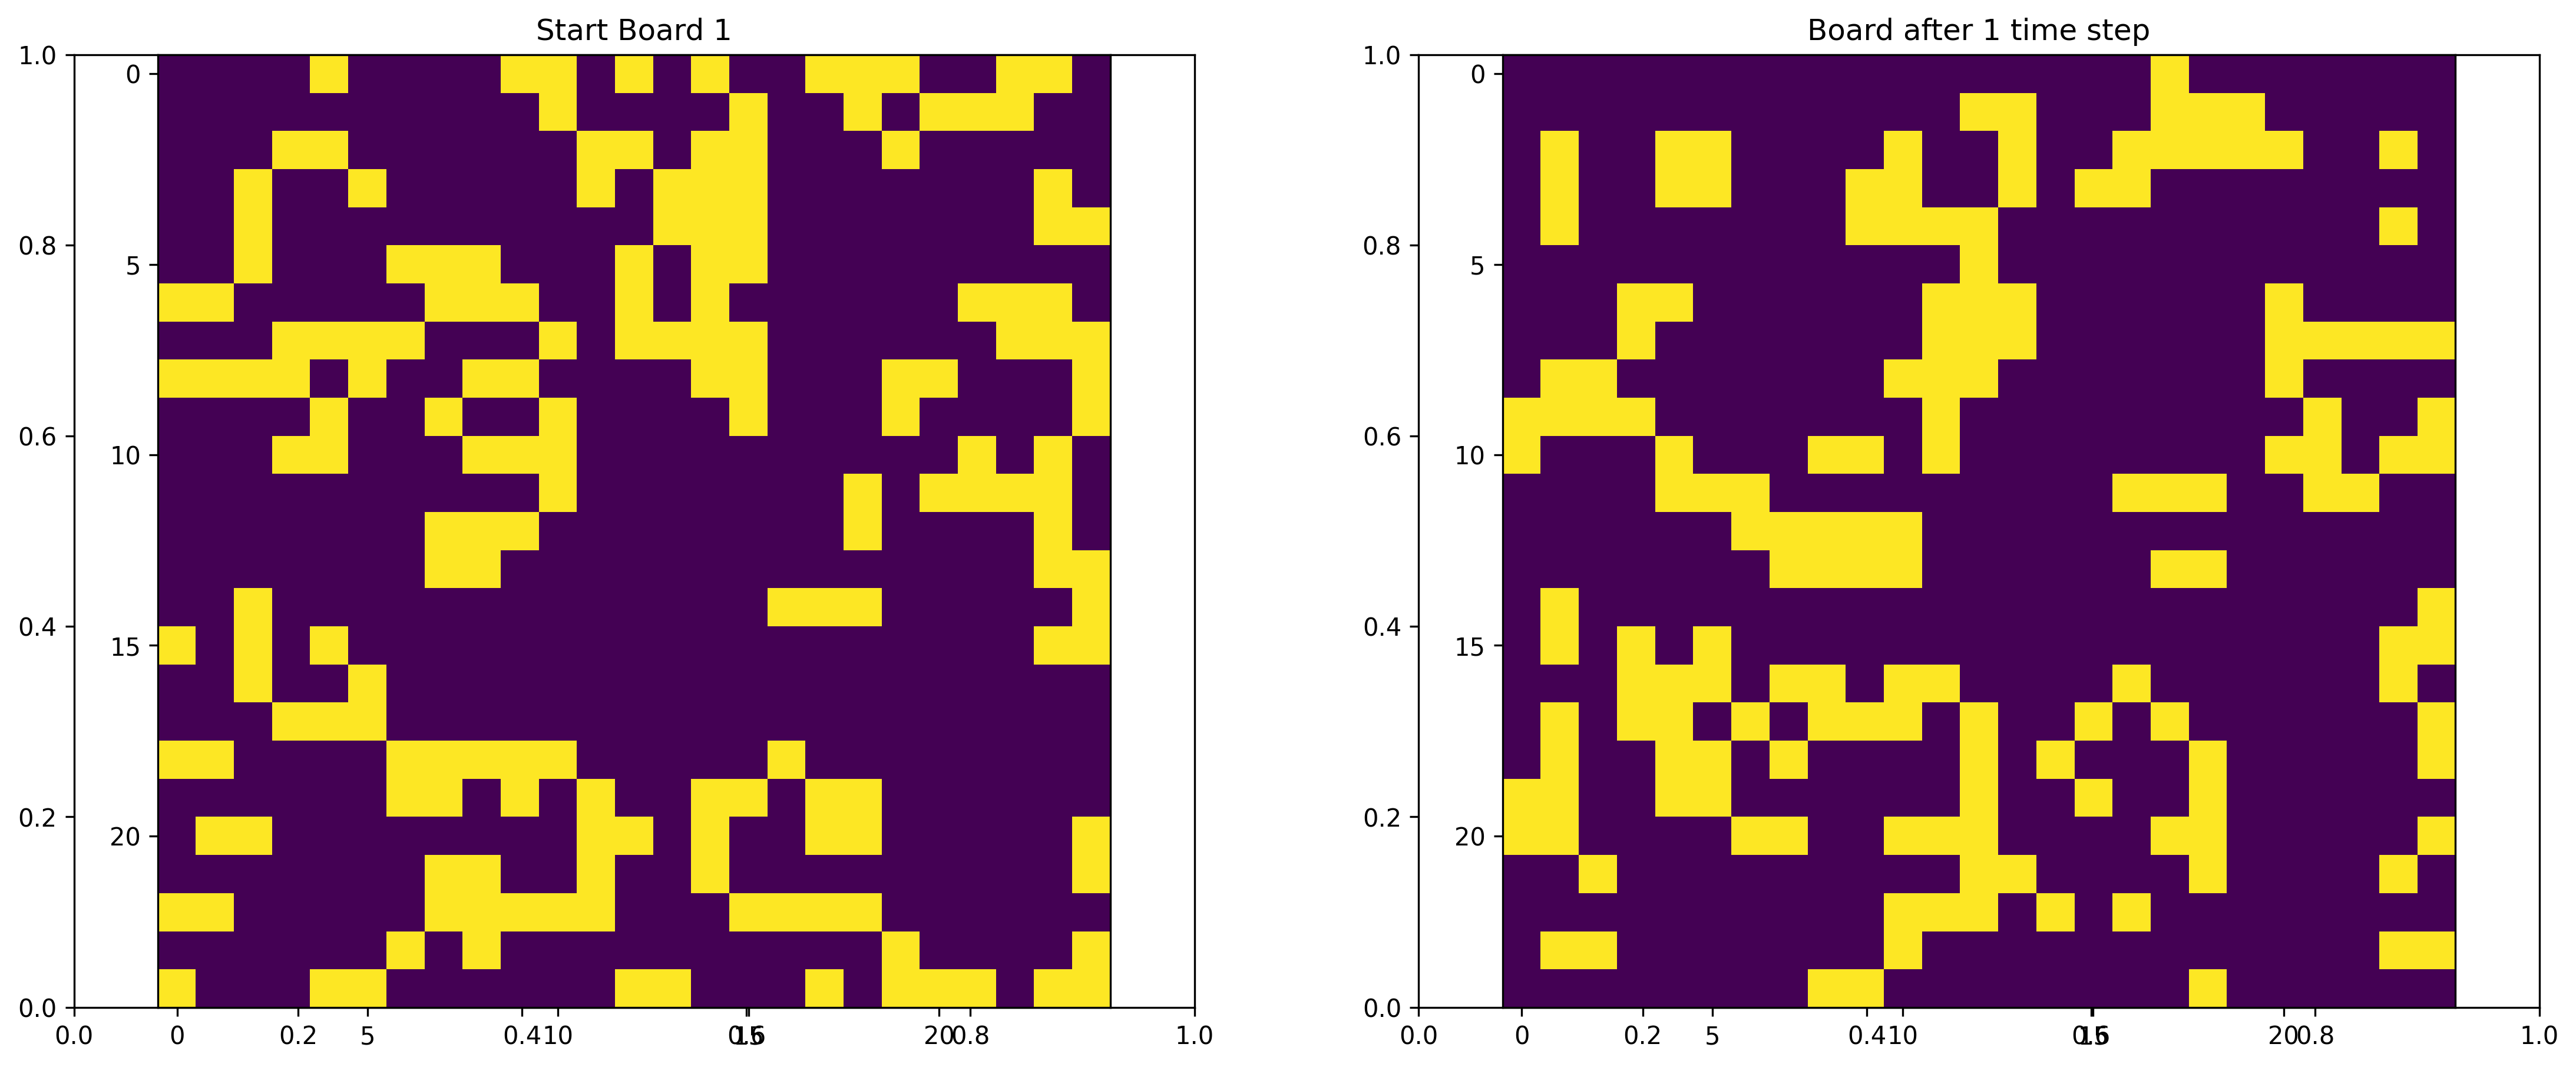

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7), dpi=300)
ax[0] = plt.subplot2grid((1,2), (0,0), colspan=1)
ax[1] = plt.subplot2grid((1,2), (0,1), colspan=1)
ax[0].imshow(sample_start_1)
ax[0].set_title('Start Board 1')
ax[1].imshow(sample_stop_1)
ax[1].set_title(f'Board after 1 time step')
plt.show()

# Check for imbalance in data

In [15]:
train.sum()[1:].sort_values()

stop_538       7093
stop_325       7109
stop_530       7109
stop_209       7116
stop_247       7118
              ...  
start_619      8125
start_360      8129
start_218      8162
start_377      8182
delta        149627
Length: 1251, dtype: int64

There is no such imbalance visible in the dataset. Imbalance could have caused some shake-up in the end.

In [16]:
train[:1]

,id,delta,start_0,start_1,start_2,start_3,start_4,start_5,start_6,start_7,...,stop_615,stop_616,stop_617,stop_618,stop_619,stop_620,stop_621,stop_622,stop_623,stop_624
0,0,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
gs=train[:1][[col for col in train.columns if 'start' in col]].values.reshape(-1,1)

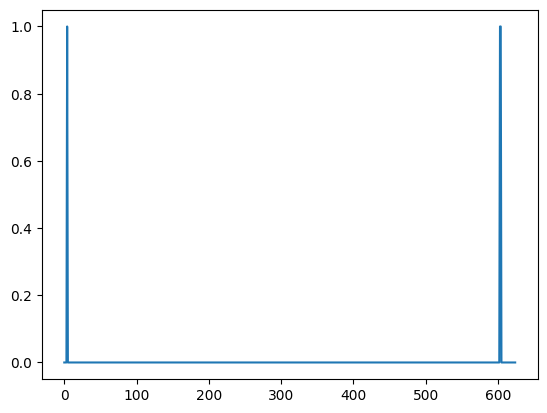

In [18]:
plt.plot(gs)

<Axes: ylabel='Frequency'>

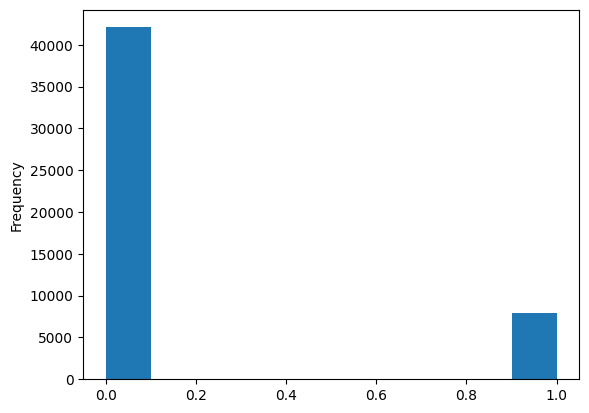

In [19]:
train['start_0'].plot(kind='hist')

<Axes: ylabel='Frequency'>

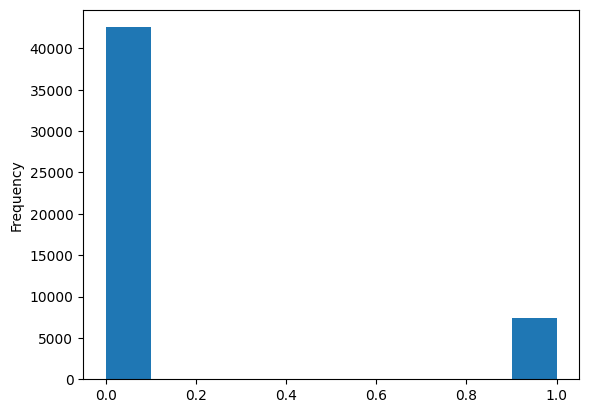

In [20]:
train['stop_0'].plot(kind='hist')

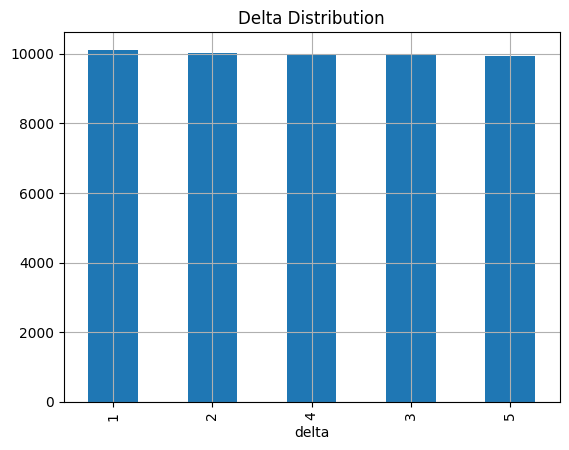

In [21]:
train.delta.value_counts().plot(kind='bar')
plt.title('Delta Distribution')
plt.grid()
plt.show()

In [22]:
test.shape

(50000, 627)

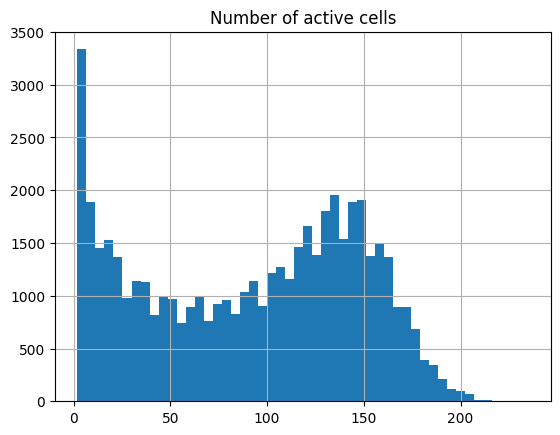

In [23]:
test_sum = test.copy()
test_sum = test_sum.drop(['id','delta'], axis=1)
active_count = test_sum.sum(axis=1)
active_count
plt.hist(active_count.values,50)
plt.grid()
plt.title('Number of active cells')
plt.show()

# CNN using Cython and Conv2D  [Reference](https://github.com/ptyshevs)

In [24]:
%%cython
cimport cython
import numpy as np

@cython.cdivision(True)
@cython.boundscheck(False)
@cython.nonecheck(False)
@cython.wraparound(False)
cdef int calc_neighs(unsigned char[:, :] field, int i, int j, int n, int k):
    cdef:
        int neighs = 0;
        int i_min = i - 1;
        int i_pl = i + 1;
        int j_min = j - 1;
        int j_pl = j + 1;
    neighs = 0
    if i_min >= 0:
        if j_min >= 0:
            neighs += field[i_min, j_min]
        neighs += field[i_min, j]
        if j_pl < k:
            neighs += field[i_min, j_pl]
    if j_min >= 0:
        neighs += field[i, j_min]
    if j_pl < k:
        neighs += field[i, j_pl]
    if i_pl < n:
        if j_min >= 0:
            neighs += field[i_pl, j_min]
        neighs += field[i_pl, j]
        if j_pl < k:
            neighs += field[i_pl, j_pl]
    return neighs

@cython.cdivision(True)
@cython.boundscheck(False)
@cython.nonecheck(False)
@cython.wraparound(False)
cpdef make_move(unsigned char[:, :] field, int moves):
    cdef:
        int _, i, j, neighs;
        int n, k;
        int switch = 0;
        unsigned char[:, :] cur_field;
        unsigned char[:, :] next_field;
    cur_field = np.copy(field)
    next_field = np.zeros_like(field, 'uint8')
    n = field.shape[0]
    k = field.shape[1]
    for _ in range(moves):
        if switch == 0:
            for i in range(n):
                for j in range(k):
                    neighs = calc_neighs(cur_field, i, j, n, k)
                    if cur_field[i, j] and neighs == 2:
                        next_field[i, j] = 1
                    elif neighs == 3:
                        next_field[i, j] = 1
                    else:
                        next_field[i, j] = 0
        else:
            for i in range(n):
                for j in range(k):
                    neighs = calc_neighs(next_field, i, j, n, k)
                    if next_field[i, j] and neighs == 2:
                        cur_field[i, j] = 1
                    elif neighs == 3:
                        cur_field[i, j] = 1
                    else:
                        cur_field[i, j] = 0
        switch = (switch + 1) % 2
    return np.array(next_field if switch else cur_field)

In [25]:
NROW, NCOL = 25, 25

def generate_samples(delta=1, n=32):
    batch = np.split(np.random.binomial(1, 0.5, (NROW * n, NCOL)).astype('uint8'), n)
    Yy = [life.make_move(state, 5) for state in batch]
    Xx = [life.make_move(state, 1) for state in Yy]
    Y = np.array([y.ravel() for y in Yy])
    X = np.array([x.ravel() for x in Xx])
    return X, Y
    
def data_generator(delta=1, batch_size=32, ravel=True):
    while True:
        batch = np.split(np.random.binomial(1, 0.5, (NROW * batch_size, NCOL)).astype('uint8'),
                         batch_size)
        Yy = [make_move(state, 5) for state in batch]
        Xx = [make_move(state, delta) for state in Yy]

        if ravel:
            Y = np.array([y.ravel() for y in Yy])
            X = np.array([x.ravel() for x in Xx])
            yield X, Y
        else:
            yield np.array(Xx)[:,:, :, np.newaxis], np.array(Yy)[:, :, :, np.newaxis]

In [26]:
def create_model(n_hidden_convs=2, n_hidden_filters=128, kernel_size=5):
    nn = Sequential()
    nn.add(Conv2D(n_hidden_filters, kernel_size, padding='same', activation='relu',
                  input_shape=(25, 25, 1)))
    nn.add(BatchNormalization())
    for i in range(n_hidden_convs):
        nn.add(Conv2D(n_hidden_filters, kernel_size, padding='same', activation='relu'))
        nn.add(BatchNormalization())
    nn.add(Conv2D(1, kernel_size, padding='same', activation='sigmoid'))
    nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return nn

In [27]:
models = []
for delta in range(1, 6):
    model = create_model(n_hidden_convs=6, n_hidden_filters=256)
    es = EarlyStopping(monitor='loss', patience=9, min_delta=0.001)
    model.fit_generator(data_generator(delta=delta, ravel=False), 
                        steps_per_epoch=500, epochs=50, verbose=1, callbacks=[es])
    models.append(model)

c:\Users\דרור\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AttributeError: 'Sequential' object has no attribute 'fit_generator'

In [ ]:
test = pd.read_csv('../input/conways-reverse-game-of-life-2020/test.csv', index_col='id')

In [ ]:
submit_df = pd.DataFrame(index=test.index, columns=['start_' + str(i) for i in range(625)])

In [ ]:
for delta in range(1, 6):
    mod = models[delta-1]
    delta_df = test[test.delta == delta].iloc[:, 1:].values.reshape(-1, 25, 25, 1)
    submit_df[test.delta == delta] = mod.predict(delta_df).reshape(-1, 625).round(0).astype('uint8')

In [ ]:
submit_df.to_csv('submission.csv')